In [7]:
#уровень 0
import numpy as np
import math as mt

In [8]:
#Диагональная, ортогональная, но не единичная(!)
#она же Верхнетреугольная, ортогональная
#она же Нижнетреугольная, ортогональная

A0 = np.array ([[-1* mt.cos(mt.radians(0)),mt.sin(mt.radians(0)),mt.sin(mt.radians(0))],            
                [mt.sin(mt.radians(0)),-1* mt.cos(mt.radians(0)),mt.sin(mt.radians(0))],
                [mt.sin(mt.radians(0)),mt.sin(mt.radians(0)),-1 * mt.cos(mt.radians(0))]])
AT = A0.transpose()
print('матрица: ', A0, sep='\n')
print('проверка: ', A0.dot(AT), sep='\n')

матрица: 
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
проверка: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
#Матрица, у которой определитель = 1, и все элементы не равны 0

m = np.array([[1.5, 2.],
              [1., 2.]])
print('матрица: ', m, sep='\n')
print('определитель: ', np.linalg.det(m), sep='\n')

матрица: 
[[1.5 2. ]
 [1.  2. ]]
определитель: 
1.0


In [10]:
#Найдите собственные значения и собственные векторsы матриц

m = np.array([[2, 2],
              [1, 3]])
w,v = np.linalg.eig(m)
for i in range(len(w)):
    print("собственное значение: " + str(w[i]))
    print("соответствующий собственный вектор: " + str(v[i]))

собственное значение: 1.0
соответствующий собственный вектор: [-0.89442719 -0.70710678]
собственное значение: 4.0
соответствующий собственный вектор: [ 0.4472136  -0.70710678]


In [11]:
#уровень 1
#Найдите спектральное разложение матрицы

m = np.array([[1, 2],
              [2,3]])
w,v = np.linalg.eig(m)
V = v.T   
L = np.diag(w)         

M = v.dot(L).dot(V)

print(M)

[[1. 2.]
 [2. 3.]]


<class 'numpy.ndarray'>


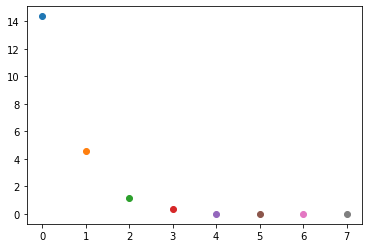

In [12]:
#Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного 
#количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

digits, y = load_digits(return_X_y=True)
img = digits[0]
img = img.reshape(-1,8)
plt.figure()

for i in range(0,8):
    pca = PCA(n_components=i)
    pca.fit(img)
    digitT = pca.transform(img)
    digitBack = pca.inverse_transform(digitT)
    mse = mean_squared_error(img, digitBack)
    plt.plot(i,mse,'o')